<h1><center> Arrival Time Visualization <br><br> 
<center> Differential Privacy Application<br><br> 
Wendy Shi</center></center>

# TOC
- [Pii](#P_ii)
- [Pij](#Pij-visualization,-box-plot)
- [Number of links being zeros](#Count-the-total-number-of-zeros)

# Preparation

In [1]:
#Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import scipy.stats as stats
import statistics

# Original weight matrix

In [2]:
Ori_mt = pd.read_csv("IL_Data/Individual/IL_ori_indi.csv")
Ori_mt = Ori_mt.drop(columns = 'Unnamed: 0')

P8_mt = pd.read_csv("IL_Data/Individual/IL_P8_indi.csv")
P8_mt = P8_mt.drop(columns = 'Unnamed: 0')

P5_mt = pd.read_csv("IL_Data/Individual/IL_P5_indi.csv")
P5_mt = P5_mt.drop(columns = 'Unnamed: 0')

P3_mt = pd.read_csv("IL_Data/Individual/IL_P3_indi.csv")
P3_mt = P3_mt.drop(columns = 'Unnamed: 0')

P1_mt = pd.read_csv("IL_Data/Individual/IL_P1_indi.csv")
P1_mt = P1_mt.drop(columns = 'Unnamed: 0')

P05_mt = pd.read_csv("IL_Data/Individual/IL_P05_indi.csv")
P05_mt = P05_mt.drop(columns = 'Unnamed: 0')

P01_mt = pd.read_csv("IL_Data/Individual/IL_P01_indi.csv")
P01_mt = P01_mt.drop(columns = 'Unnamed: 0')

P005_mt = pd.read_csv("IL_Data/Individual/IL_P005_indi.csv")
P005_mt = P005_mt.drop(columns = 'Unnamed: 0')

In [3]:
P005_mt.head(3)

,17001,17005,17007,17011,17015,17017,17019,17021,17023,17025,...,17185,17187,17189,17191,17193,17195,17197,17199,17201,17203
0,0.821970,0.000248,0.000000,0.000083,0.000000,0.000619,0.000222,0.000088,0.000193,0.001576,...,0.0,0.000015,0.000159,0.00000,0.0,0.000612,0.008754,0.003826,0.005201,0.000000
1,0.000002,0.206611,0.000000,0.000000,0.000000,0.003602,0.029424,0.014366,0.000000,0.001671,...,0.0,0.000105,0.000572,0.00284,0.0,0.003405,0.013255,0.011955,0.001832,0.000652
2,0.000000,0.000000,0.304641,0.000044,0.002521,0.000000,0.003864,0.000000,0.000000,0.000000,...,0.0,0.009086,0.000000,0.00000,0.0,0.004041,0.027094,0.000000,0.172675,0.000000


In [4]:
Original_np = Ori_mt.to_numpy()
P8_np = P8_mt.to_numpy()
P5_np = P5_mt.to_numpy()
P3_np = P3_mt.to_numpy()
P1_np = P1_mt.to_numpy()
P05_np = P05_mt.to_numpy()
P01_np = P01_mt.to_numpy()
P005_np = P005_mt.to_numpy()

# P_ii

In [5]:
ori_list = [Original_np[i][i] for i in range(86)]
P8_list = [P8_np[i][i] for i in range(86)]
P5_list = [P5_np[i][i] for i in range(86)]
P3_list = [P3_np[i][i] for i in range(86)]
P1_list = [P1_np[i][i] for i in range(86)]
P05_list = [P05_np[i][i] for i in range(86)]
P01_list = [P01_np[i][i] for i in range(86)]
P005_list = [P005_np[i][i] for i in range(86)]

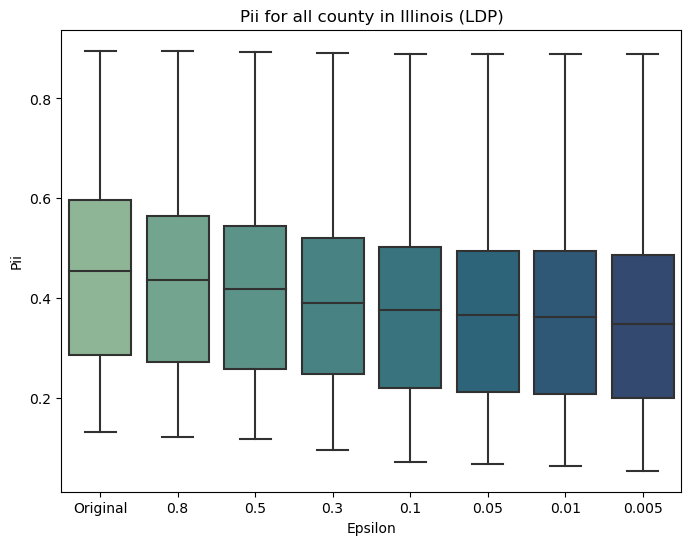

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining data into a list of lists
data = [ori_list, P8_list, P5_list, P3_list, P1_list, P05_list, P01_list, P005_list]

color = sns.color_palette("crest", n_colors=8)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, palette=color, saturation=0.7, showfliers=False)

# Adding labels and title
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['Original', '0.8', '0.5', '0.3', '0.1','0.05','0.01', '0.005'])
plt.title("Pii for all county in Illinois (LDP)")
plt.ylabel("Pii")
plt.xlabel("Epsilon")

# Save plot
plt.savefig("Pii_staying_indi_IL.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


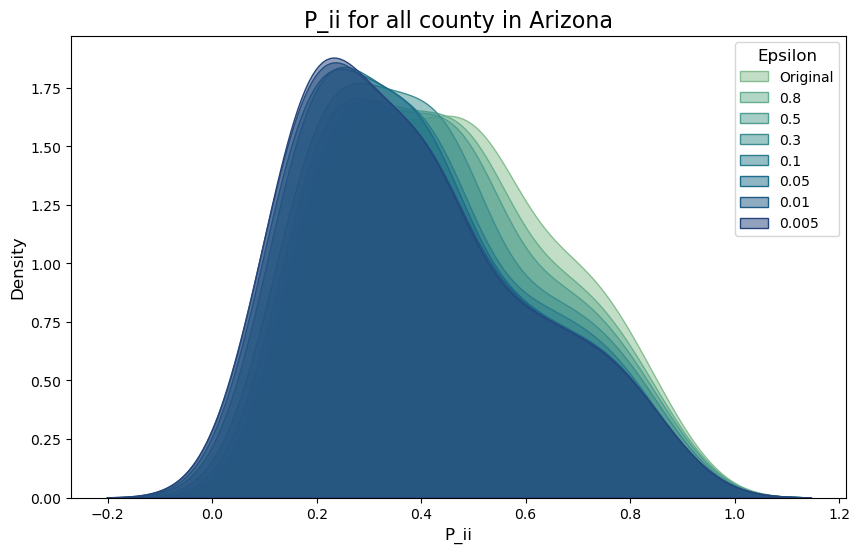

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining data into a list of lists
data = [ori_list, P8_list, P5_list, P3_list, P1_list, P05_list, P01_list, P005_list]
labels = ['Original', '0.8', '0.5', '0.3', '0.1', '0.05','0.01','0.005']

# Generate a color palette
color = sns.color_palette("crest", n_colors=8)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

# Loop through datasets to plot their density
for i, dataset in enumerate(data):
    sns.kdeplot(dataset, label=labels[i], color=color[i], fill=True, alpha=0.5)

# Adding labels and title
plt.title("P_ii for all county in Arizona", fontsize=16)
plt.xlabel("P_ii", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Adding a legend
plt.legend(title="Epsilon", fontsize=10, title_fontsize=12)

# Save plot (optional)
#plt.savefig("Pii_Density_Plot_all_agg.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Pij visualization, box plot

In [12]:
import math

In [8]:
def outflow_wt_all(matrix):
    
    '''
    
    This function defines all outflow rate
    
    '''
    
    P_ij = []
    
    for i in range(86):
        for j in range(86):
            if i != j:
                P_ij.append(matrix[i][j])
                
    return(P_ij)

In [9]:
def out_stat(data):
    
    series = pd.Series(data)
    
    #This print summary statistics
    minimum = series.min()
    point25 = series.quantile(0.25)
    median = series.median()
    point75 = series.quantile(0.75)
    maximum = series.max()
     
    #This print the summary statistcis    
    out_list = [minimum, point25, median, point75, maximum]
    print(out_list)
    
    #This only takes the first 75% of the data
    plotting_data = [i for i in data if i < point75]
    
    return(plotting_data)

In [10]:
out_ori = outflow_wt_all(Original_np)
print(len(out_ori))
#ori_75 = out_stat(out_ori)

7310


In [13]:
log_ori = [math.log(x) for x in out_ori if x != 0]
print(len(log_ori))

5273


In [14]:
out_P8 = outflow_wt_all(P8_np)
log_P8 = [math.log(x) for x in out_P8 if x != 0]
print(len(log_P8))

5059


In [15]:
out_P5 = outflow_wt_all(P5_np)
log_P5 = [math.log(x) for x in out_P5 if x != 0]
print(len(log_P5))

5013


In [16]:
out_P3 = outflow_wt_all(P3_np)
log_P3 = [math.log(x) for x in out_P3 if x != 0]
print(len(log_P3))

4921


In [17]:
out_P1 = outflow_wt_all(P1_np)
log_P1 = [math.log(x) for x in out_P1 if x != 0]
print(len(log_P1))

4871


In [18]:
out_P05 = outflow_wt_all(P05_np)
log_P05 = [math.log(x) for x in out_P05 if x != 0]
print(len(log_P05))

4845


In [19]:
out_P01 = outflow_wt_all(P01_np)
log_P01 = [math.log(x) for x in out_P01 if x != 0]
print(len(log_P01))

4839


In [20]:
out_P005 = outflow_wt_all(P005_np)
log_P005 = [math.log(x) for x in out_P005 if x != 0]
print(len(log_P005))

4825


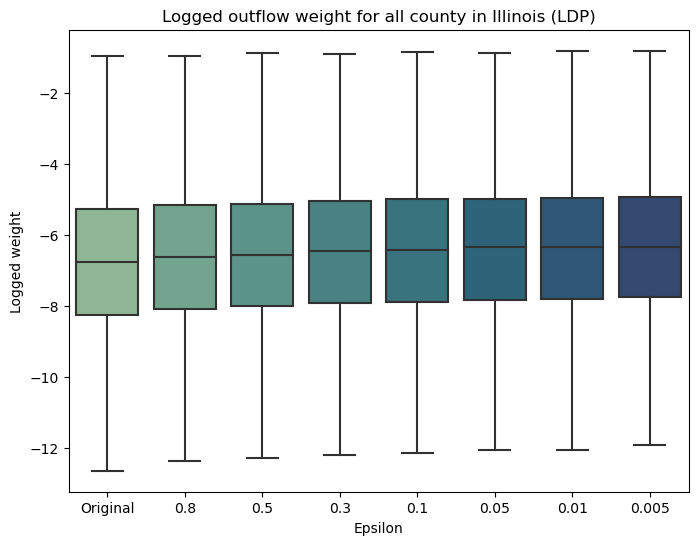

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining data into a list of lists
#data = [out_ori, out_P5, out_P1, out_P05, out_P01, out_P005, out_P001]
data = [log_ori, log_P8, log_P5, log_P3, log_P1, log_P05, log_P01, log_P005]

color = sns.color_palette("crest", n_colors=8)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, palette=color, saturation=0.7, showfliers=False)

# Adding labels and title
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], 
           ['Original', '0.8','0.5','0.3','0.1', '0.05','0.01','0.005'])
#plt.xticks([0, 1, 2, 3, 4], 
#           ['Original', '0.5','0.1','0.05','0.01'])
plt.title("Logged outflow weight for all county in Illinois (LDP)")
plt.ylabel("Logged weight")
plt.xlabel("Epsilon")

# Save plot
plt.savefig("Pij_outflow_logged_no_outlier_IL_indi.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


# Count the total number of zeros

In [23]:
#outflow zero
def outflow_zero(matrix):
    P_ij_zero = []
    
    for i in range(86):
        #all outflow weight list every county
        working_list = []
        for j in range(86):
            if i != j and matrix[i][j] == 0:
                P_ij_zero.append((i,j))
    
    return(P_ij_zero)

In [24]:
total_links = 86*86

In [25]:
zero_ori = outflow_zero(Original_np)
len(zero_ori)

2037

In [26]:
zero_P8 = outflow_zero(P8_np)
len(zero_P8)

2251

In [27]:
zero_P5 = outflow_zero(P5_np)
len(zero_P5)

2297

In [28]:
zero_P3 = outflow_zero(P3_np)
len(zero_P3)

2389

In [29]:
zero_P1 = outflow_zero(P1_np)
len(zero_P1)

2439

In [30]:
zero_P05 = outflow_zero(P05_np)
len(zero_P05)

2465

In [31]:
zero_P01 = outflow_zero(P01_np)
len(zero_P01)

2471

In [32]:
zero_P005 = outflow_zero(P005_np)
len(zero_P005)

2485

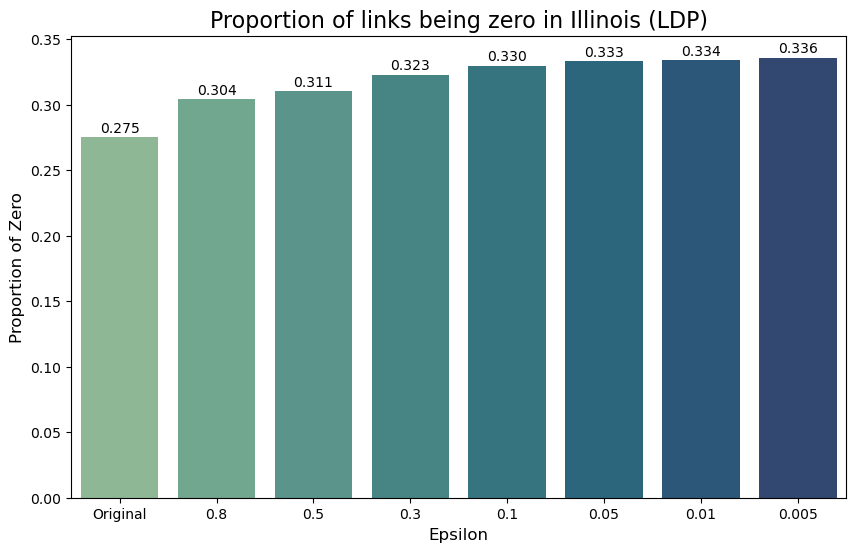

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
data = [len(zero_ori)/total_links,
        len(zero_P8)/total_links, 
        len(zero_P5)/total_links,
        len(zero_P3)/total_links,
        len(zero_P1)/total_links, 
        len(zero_P05)/total_links, 
        len(zero_P01)/total_links,
        len(zero_P005)/total_links
       ]
labels = ['Original', '0.8', '0.5', '0.3','0.1', '0.05', '0.01', '0.005']

# Generate a color palette
color = sns.color_palette("crest", n_colors= 8)

# Create a DataFrame for easier handling
df = pd.DataFrame({'Epsilon': labels, 'Number of Zero': data})

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Epsilon', y='Number of Zero', palette=color, data=df)

# Adding labels and title
plt.title("Proportion of links being zero in Illinois (LDP)", fontsize=16)
plt.xlabel("Epsilon", fontsize=12)
plt.ylabel("Proportion of Zero", fontsize=12)

# Add data labels on each bar
for i, bar in enumerate(barplot.patches):
    bar_height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        bar_height*1.005,  # y-coordinate slightly above the bar
        f'{bar_height:.3f}',  # Data label
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Save plot (optional)
plt.savefig("Proportion_of_Zero_indi_IL.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
